## t-test demo

Copyright 2020 by Joshua I. Gold, University of Pennsylvania

In [3]:
import platform

# Output on system used for development/testing:
# 3.9.2
print(platform.python_version())

# Uncomment and run to clear workspace
# %reset

3.9.2


### One-sample t-test for H0:mean=0

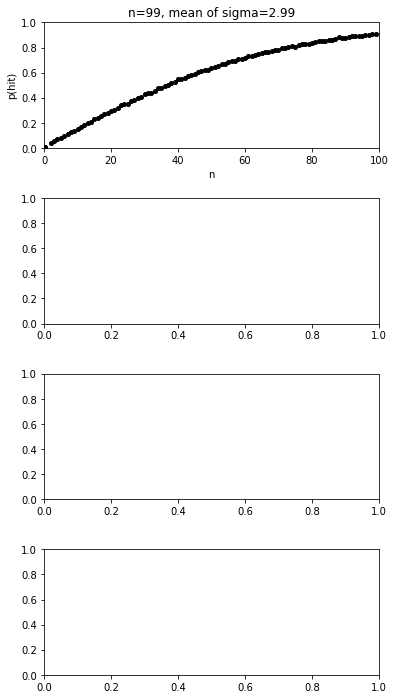

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Define a test distribution with a population mean different than 0 and a std of >1
test_mu  = 1
test_std = 3

# Null distribution
null_mu  = 0
null_std = test_std

# Max number of samples
max_n = 100

# for histograms
data_bin_size = 0.1
data_bins = np.arange(-10-data_bin_size/2, 10+1.5*data_bin_size, data_bin_size)
dax = (data_bins[1:] + data_bins[:-1])/2

# for simulations 
num_experiments = 10000

# Set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Simulate different sample sizes
for n in np.arange(2, max_n):

    # Clear figures
    plt.axes(axs[1]).cla()
    plt.axes(axs[2]).cla()
    plt.axes(axs[3]).cla()

    # Simulate multiple experiments
    samples = np.random.normal(test_mu, test_std, (num_experiments, n))

    # Compute the t-statistic from each experient
    t_stats = samples.mean(axis=1)/samples.std(axis=1,ddof=1)*np.sqrt(n)

    # Top plot is probability of identifying a real effect as a function of n
    plt.axes(axs[0]).axis([0, max_n, 0, 1])
    plt.plot(0, 0, 'ko')
    plt.xlabel('n')
    plt.ylabel('p(hit)')
    plt.axes(axs[0]).plot(n, np.count_nonzero(t_stats>st.t.ppf(0.975, n-1))/num_experiments, 'k.', markersize=8)
    plt.title(f'n={n}, mean of sigma={samples.std(axis=1, ddof=1).mean():.2f}')

    # Second-to-top plot is normal, t distributions of mean, and samples
    counts, edges = np.histogram(t_stats, data_bins)
    plt.axes(axs[1]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.t.pdf(dax, n-1), 'r-', linewidth=2)
    plt.plot(dax, st.t.pdf(dax-test_mu/test_std*np.sqrt(n), n-1), 'r--', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, 0, 1), 'g-', linewidth=2)
    plt.plot(st.t.ppf(0.975, n-1)*np.array([1.0, 1.0]), [0, 0.5], 'm-', linewidth=3)

    # set/label axes
    plt.axis([-4, 4, 0, 0.5])
    plt.xlabel('Value (t units)')
    plt.ylabel('probability')

    # Second-to-bottom plot is distributions of means
    counts, edges = np.histogram(samples.mean(axis=1), data_bins)
    plt.axes(axs[2]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std/np.sqrt(n)), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std/np.sqrt(n)), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 1.5])
    plt.xlabel('mean value (actual units)')
    plt.ylabel('probability')      

    # Bottom plot is null, test distributions. Show one 'experiment'
    counts, edges = np.histogram(samples[0,:], bins=data_bins)
    plt.axes(axs[3]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 0.25])
    plt.xlabel('data value (actual units)')
    plt.ylabel('probability')      

    # Clear for next plot
    display(fig)
    clear_output(wait=True)
